# Transformational Theory - Draft

## Some examples to test transformational functions with music21

This is a Jupyter notebook created by [@musicenfanthen](https://github.com/musicEnfanthen) to work with some basic functions of transformational theory by David Lewin (and others; see e.g. Lewin, GMIT, 2007). 

For more information on Jupyter notebooks go to http://jupyter.org/. 

To execute a block of code in this notebook, click in the cell and press `Shift+Enter`.

To get help on any music21 routine, click on it and press `Shift+Tab`.

In [1]:
from music21 import *

Probably you have to set manually the correct file path to an Application that is able to open MusicXML files (like MuseScore). To do so, use the music21.environment module to set an musicxmlPath key.

Make sure to change the string path/to/your/musicXmlApplication below to the correct file path (keep the quotation marks):

    on Mac e.g.: /Applications/MuseScore 2.app/Contents/MacOS/mscore
    or on Windows e.g.: C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe

and uncomment the line (remove the # at the begin of the line).

In the same way, you can also add a path to your lilypond installation, using env['lilypondPath']:

    on Mac e.g.: Applications/Lilypond.app
    on Windows e.g.: C:/Program Files (x86)/LilyPond/usr/bin/lilypond.exe

Sometimes it's also necessary to adapt the musescoreDirectPNGPath. Check if it corresponds to your museScore path.

In [2]:
# definition of environment settings is different from the settings 
# when this jupyter notebook runs locally on your machine.
# Changes are necessary because jupyter notebook is running via Binder image

env = environment.Environment()

env['lilypondPath']='/usr/bin/lilypond'
env['musescoreDirectPNGPath'] = '/usr/bin/musescore'
env['musicxmlPath'] = '/usr/bin/musescore'

environment.set('pdfPath', '/usr/bin/musescore')
environment.set('graphicsPath', '/usr/bin/musescore')

print('Environment settings:')
print('musicXML:  ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])
print('lilypond:  ', env['lilypondPath'])

Environment settings:
musicXML:   /Applications/MuseScore 2.app/Contents/MacOS/mscore
musescore:  /Applications/MuseScore 2.app/Contents/MacOS/mscore
lilypond:   /Applications/Lilypond.app/Contents/Resources/bin/lilypond


<div class="alert alert-block alert-warning">
Using jupyter notebook inside a Binder image causes some issues with music21's ".show()"-method (see: https://github.com/cuthbertLab/music21/issues/260). Thanks to Tony Hirst (@psychemedia) there is a small workaround with a redefinition of the method:
</div>

In [ ]:
# re-definition of show()-method ---> "HACK" from https://github.com/psychemedia/showntell/blob/music/index_music.ipynb
# see also this music21 issue: https://github.com/cuthbertLab/music21/issues/260
%load_ext music21.ipython21

from IPython.display import Image

def render(s):
    s.show('lily.png')
    return Image(filename=s.write('lily.png'))

In [50]:
def createMusic21NoteObjectFromIntervall(pitchArray):
    n1 = note.Note(pitchArray[0])       
    n2 = note.Note(pitchArray[1])
    return [n1, n2]


def showStream(prevNote, curNote, transformStr):    
    # full name
    prevFull = prevNote.pitch.unicodeNameWithOctave
    curFull = curNote.pitch.unicodeNameWithOctave
    
    
    # pitch class
    prevPc = prevNote.pitch.pitchClass
    curPc = curNote.pitch.pitchClass
    
    # frequency
    prevFreq = prevNote.pitch.freq440
    curFreq = curNote.pitch.freq440
    
    # midi
    prevMidi = prevNote.pitch.midi
    curMidi = curNote.pitch.midi
    
    curNote.offset = 1.0
    
    if not prevNote.lyrics:
        prevNote.addLyric('full: ' + str(prevFull))
        prevNote.addLyric('pc:   ' + str(prevPc))
        prevNote.addLyric('midi: ' + str(prevMidi))
        prevNote.addLyric('freq: ' + str(prevFreq))
            
    if not curNote.lyrics:
        curNote.addLyric('full: ' + str(curFull))
        curNote.addLyric('pc:   ' + str(curPc))
        curNote.addLyric('midi: ' + str(curMidi))
        curNote.addLyric('freq: ' + str(curFreq))
           
    intStream = stream.Score()           # create Score
    intStream.append(prevNote)
    intStream.append(curNote)
    
    # output
    print(transformStr)
    intStream.show('text')                     # output of the stream (using the .show()-method)

    

def getTransposition(prevNote, curNote):
    #get pitch classes
    curPc = curNote.pitch.pitchClass
    prevPc = prevNote.pitch.pitchClass
    
    # transposition string
    transStr = "T"
    n = (curPc - prevPc) % 12
    transStr += str(n)
    
    # output
    showStream(prevNote, curNote, transStr)

    
def getInversion(prevNote, curNote):
    #get pitch classes
    curPc = curNote.pitch.pitchClass
    prevPc = prevNote.pitch.pitchClass
    
    # inversion string
    invStr = "I"
    n = (curPc + prevPc) % 12
    invStr += str(n)
    
    # output
    showStream(prevNote, curNote, invStr)

    
def getTranspositionAndInversion(pitchArray):
    # pitchArray = [pitch1, pitch2]
    if len(pitchArray) > 2:
        return
    
    noteArray = createMusic21NoteObjectFromIntervall(pitchArray)
    print(noteArray)
    
    getTransposition(noteArray[0], noteArray[1])
    getInversion(noteArray[0], noteArray[1])

[<music21.note.Note C#>, <music21.note.Note E>]
T3


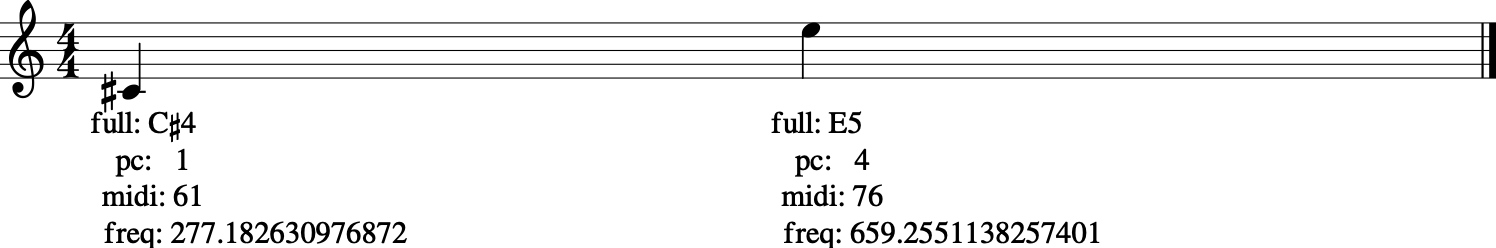

I5


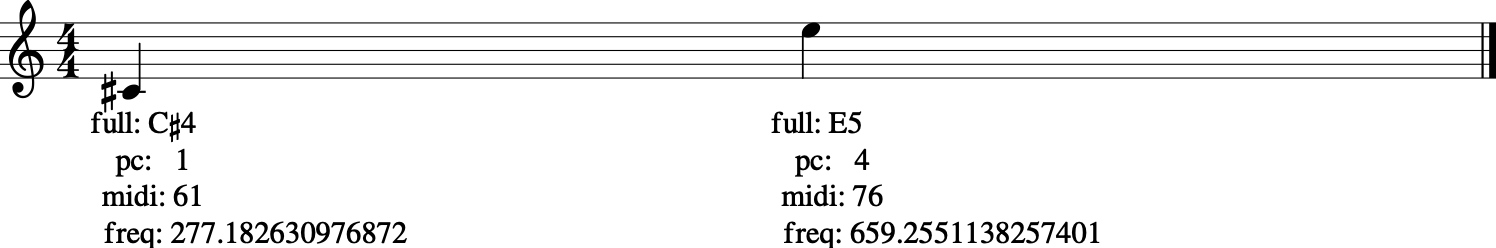

In [52]:
# example input (two pitches)
# pitchArray = [pitch1, pitch2]

pitchArray = ['C#4', 'E5']

getTranspositionAndInversion(pitchArray)
